In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\jibin\\OneDrive\\Desktop\\Lambton\\Sem-3\\AML_3104_NNDL\\Algerian_forest_fires_cleaned.csv")

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
df.duplicated().sum()

0

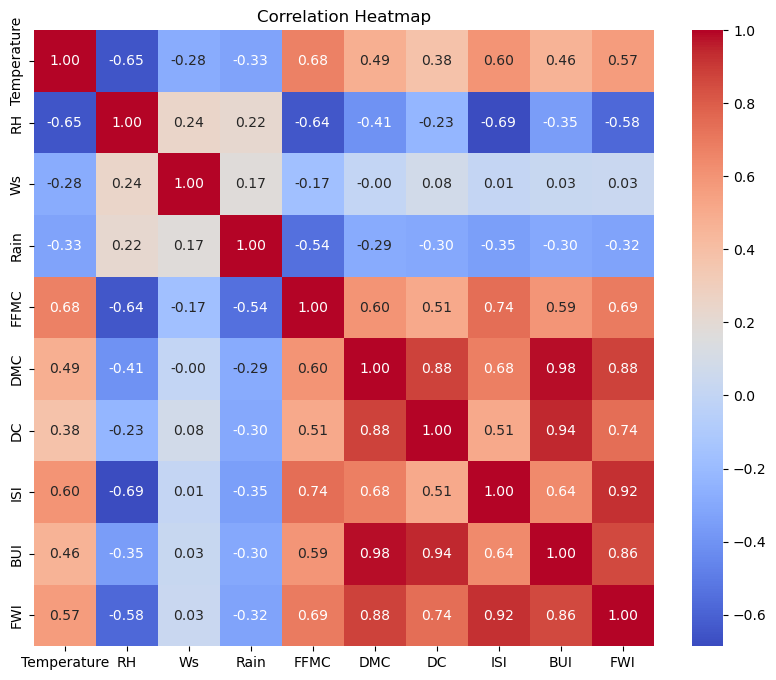

In [6]:
correlation_matrix = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")

plt.show()

In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df['Classes']= df['Classes'].str.strip()

In [9]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [10]:
df = pd.get_dummies(df, columns=['Classes'], drop_first=False)

In [11]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_fire,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0,1


In [12]:
df_ = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes_fire']]


In [13]:
df_ = df_.rename(columns={'Classes_fire': 'Classes'})

In [14]:
df_

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [17]:
X = df_[['Temperature',  'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',  'Classes']]
y=df_['FWI']

In [23]:
X

,Temperature,Ws,FFMC,DMC,DC,ISI,BUI,Classes
0,29,18,65.7,3.4,7.6,1.3,3.4,0
1,29,13,64.4,4.1,7.6,1.0,3.9,0
2,26,22,47.1,2.5,7.1,0.3,2.7,0
3,25,13,28.6,1.3,6.9,0.0,1.7,0
4,27,16,64.8,3.0,14.2,1.2,3.9,0
...,...,...,...,...,...,...,...,...
238,30,14,85.4,16.0,44.5,4.5,16.9,1
239,28,15,41.1,6.5,8.0,0.1,6.2,0
240,27,29,45.9,3.5,7.9,0.4,3.4,0
241,24,18,79.7,4.3,15.2,1.7,5.1,0


In [19]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [21]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)


In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((194, 8), (49, 8), (194,), (49,))

In [28]:
reg_model = linear_model.LinearRegression()

In [29]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [31]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [32]:
print("Prediction for test set: {}".format(y_pred))


Prediction for test set: [ 6.05176264 11.43387494 10.74452183  6.41110479  8.14370482  1.08072076
  7.04139212  3.00473307 -0.11875184 20.96724443 10.12433492 -0.06779128
 20.55919766 19.86207262 22.16848474  0.11445612  9.56986098  0.81976444
 17.27652615 12.63383098  3.63330435  5.08552238  6.63868377  0.03990432
  0.84127601 23.34819853 14.41464635  2.62423383  7.56450129 10.68342403
  3.78936385 -0.18444854  0.65758776 11.34756055 -0.05008951  1.72644001
 15.08798216 -0.10512724  0.99056539  1.02844239 10.06137156  6.06482729
 27.20084621  3.23770917  6.54180835 -0.11960046  0.24600328  7.28820698
  0.16144613]


In [33]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
65,6.1,6.051763
59,10.7,11.433875
191,10.7,10.744522
111,6.3,6.411105
112,8.3,8.143705
161,1.3,1.080721
150,7.2,7.041392
160,3.1,3.004733
99,0.4,-0.118752
83,22.3,20.967244


In [38]:
print("Test Set Metrics:")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Test Set Metrics:
Mean Absolute Error: 0.7640382627135188
Mean Square Error: 4.761056837511573
Root Mean Square Error: 2.181984609824637


In [39]:
print("\nTrain Set Metrics:")
mse_train = mean_squared_error(y_train, x_pred)
mae_train = mean_absolute_error(y_train, x_pred)
r_squared_train = reg_model.score(X_train, y_train)

print("MSE:", mse_train)
print("MAE:", mae_train)
print("R-squared:", r_squared_train)



Train Set Metrics:
MSE: 0.6068592013883295
MAE: 0.5119620421576673
R-squared: 0.9894430919283679


In [40]:
import pickle

model = "MultiLinear_regression_model.pkl"

with open(model, 'wb') as model_file:
    pickle.dump(reg_model, model_file)

print(f"Model saved to {model}")


Model saved to MultiLinear_regression_model.pkl


In [47]:
model_scaler=pickle.load(open("MultiLinear_regression_model.pkl", "rb"))

In [50]:
unseen_data =pd.DataFrame( {'Temperature': [27.8, 33.5, 20.1, 15.4, 28.9],
                            'Ws':[18,13,22,13,16],
                      'FFMC': [89.6, 84.2, 92.3, 89.1, 91.0],
                      'DMC': [120.2, 137.1, 58.5, 23.7, 120.4],
                      'DC': [443.0, 641.8, 376.6, 280.9, 686.5],
                      'ISI': [10.1, 11.3, 5.2, 4.6, 14.3],
                      'BUI': [80.5, 123.4, 44.8, 21.3, 102.0],
                      'Classes': [1,0,1,0,1]})



In [53]:
unseen_predictions = loaded_model.predict(unseen_data)
unseen_predictions

array([33.49324112, 43.85916328, 16.12562714,  8.65047796, 43.19998864])